# Linear Regression

We are using data set consisting of brain size and head size of different people.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

#Reading data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


We are going to collect X and Y.

In [3]:
#collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

Now we have to find the euqtion of line which is y = b1x + b0 where b1 = slope of the line and b0 = intercept of the line

In [6]:
# calculate mean of x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
n = len(X)

#Using the formula to caluclate b1 and b2
number = 0
denom = 0
for i in range(n):
    number += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

b1 = number/denom
b0 = mean_y - (b1 * mean_x)

#print slope and intercept
print(b1,b0)

0.26342933948939945 325.57342104944223


Plotting it Graphically

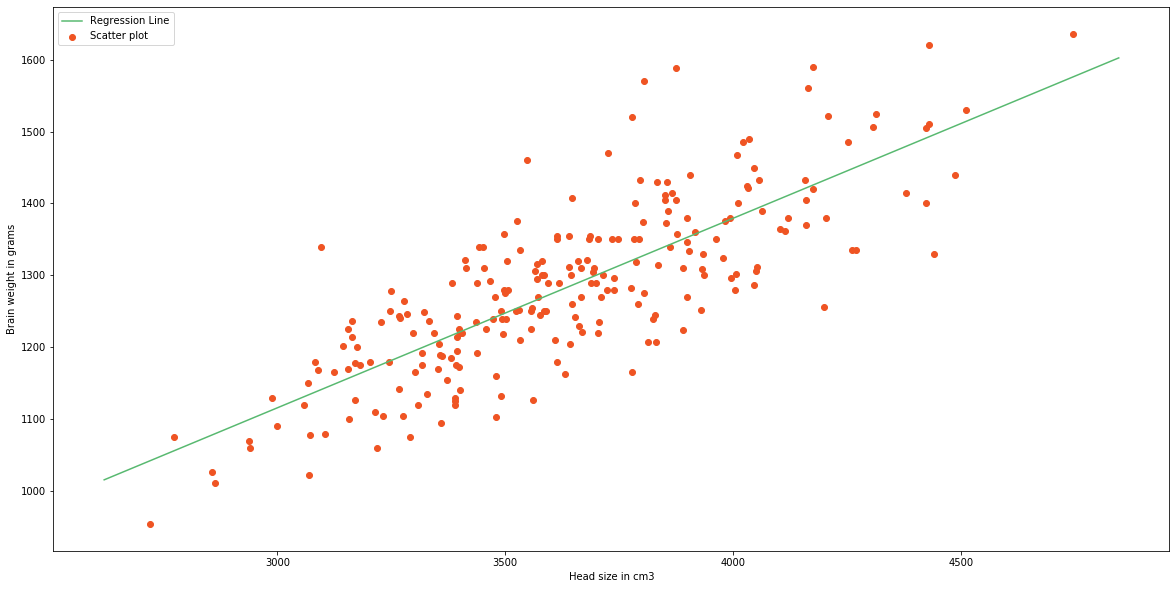

In [9]:
#plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#plotting line
plt.plot(x,y, color='#58b970', label= 'Regression Line')
#plottind scatter point
plt.scatter(X,Y, c='#ef5423', label= 'Scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

To find how good our model is we are using R squared method.As high the value of r-square as good the model is.

In [10]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# cannot use Rank1 matrix in scikit learn
X = X.reshape((n,1))
#creating model
reg = LinearRegression()
#fitting training data
reg = reg.fit(X,Y)
#Y prediction
Y_pred = reg.predict(X)

#calculating R2 square
r2_square = reg.score(X,Y)
print(r2_square)

0.639311719957
